# Visualizing Simulation Results

This notebook demonstrates how to visualize and analyze simulation outputs.

## Setup

In [4]:
import sys
sys.path.append('C:\\Users\\gavargas\\Developer\\Cascabel')

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from cascabel.models.waitline import WaitLine
from cascabel.models.simulation import Simulation
from cascabel.models.models import BorderCrossingConfig, SimulationConfig

# Set up plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

## Run a Simulation for Analysis

In [7]:
# Quick simulation setup
waitline = WaitLine(
    geojson_path="C:\\Users\\gavargas\\Developer\\Cascabel\\cascabel\\paths\\usa2mx\\bota.geojson",
    speed_regime={"slow": 0.8, "fast": 0.2},
    line_length_seed=0.5
)

border_config = BorderCrossingConfig(
    num_queues=3,
    nodes_per_queue=[2, 2, 2],
    arrival_rate=2.0,
    service_rates=[0.8, 0.9, 0.7, 0.85, 0.75, 0.9],
    queue_assignment='shortest',
    safe_distance=8.0,
    max_queue_length=50
)

simulation_config = SimulationConfig(
    max_simulation_time=3600.0,
    time_factor=1.0,
    enable_telemetry=True,
    enable_position_tracking=True
)

simulation = Simulation(
    waitline=waitline,
    border_config=border_config,
    simulation_config=simulation_config
)

simulation()
stats = simulation.get_statistics()

executing multi-queue border crossing simulation...
Simulation completed. Final statistics: simulation_config=SimulationConfig(max_simulation_time=3600.0, time_factor=1.0, enable_telemetry=True, enable_position_tracking=True) border_config=BorderCrossingConfig(num_queues=3, nodes_per_queue=[2, 2, 2], arrival_rate=2.0, service_rates=[0.8, 0.9, 0.7, 0.85, 0.75, 0.9], queue_assignment='shortest', safe_distance=8.0, max_queue_length=50) execution_stats=BorderCrossingStats(total_arrivals=9, total_completions=9, current_time=3600.0, num_queues=3, total_service_nodes=6, queue_assignment_strategy='shortest', overall_utilization=0.0, average_waiting_time=None, average_service_time=None, throughput=0.15) queue_stats=[QueueStats(queue_id=0, total_cars=3, queue_length=0, busy_nodes=0, num_service_nodes=2, utilization=0.0, average_wait_time=0.0, total_arrivals=3, total_completions=0), QueueStats(queue_id=1, total_cars=3, queue_length=0, busy_nodes=0, num_service_nodes=2, utilization=0.0, average_wa

## Queue Length Over Time

In [14]:
stats.queue_stats[0].average_wait_time

0.0

AttributeError: 'QueueStats' object has no attribute 'snapshots'

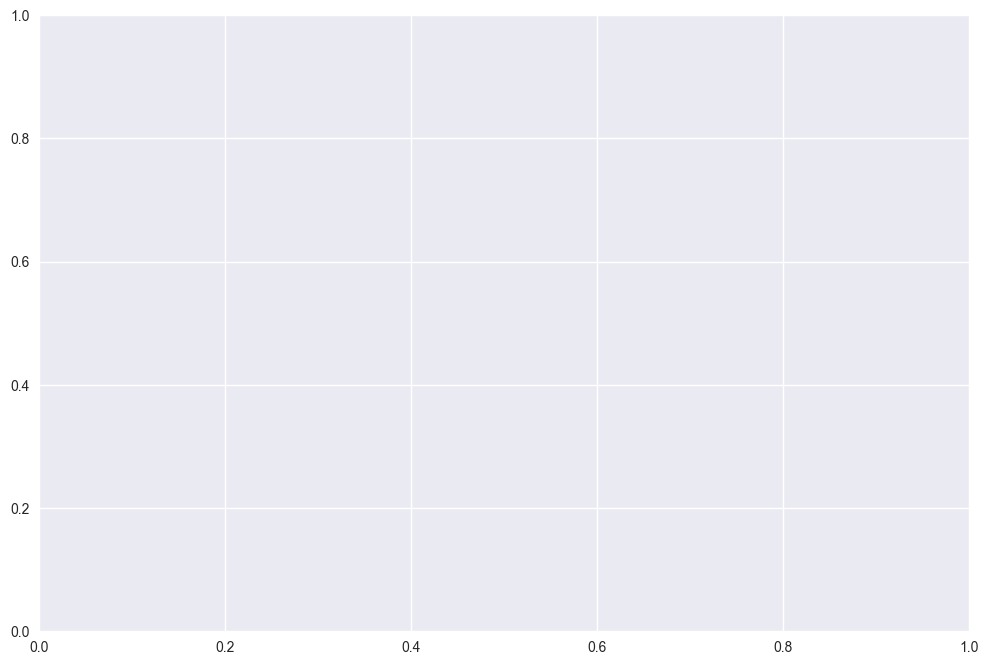

In [8]:
# Plot queue lengths
fig, ax = plt.subplots()

for i, queue_stats in enumerate(stats.queue_stats):
    times = [s.timestamp for s in queue_stats.snapshots]
    lengths = [s.length for s in queue_stats.snapshots]
    ax.plot(times, lengths, label=f'Queue {i+1}')

ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Queue Length')
ax.set_title('Queue Length Over Time')
ax.legend()
ax.grid(True)
plt.show()

## Service Utilization

In [ ]:
# Plot utilization per service node
fig, ax = plt.subplots()

nodes = []
utilizations = []

for i, queue_stats in enumerate(stats.queue_stats):
    for j, node_stats in enumerate(queue_stats.node_stats):
        nodes.append(f'Q{i+1}-N{j+1}')
        utilizations.append(node_stats.utilization)

ax.bar(nodes, utilizations)
ax.set_ylabel('Utilization')
ax.set_title('Service Node Utilization')
ax.tick_params(axis='x', rotation=45)

for i, v in enumerate(utilizations):
    ax.text(i, v + 0.01, f'{v:.1%}', ha='center')

plt.tight_layout()
plt.show()

## Wait Time Distribution

In [ ]:
# Plot wait time histogram
fig, ax = plt.subplots()

wait_times = [completion.wait_time for completion in stats.execution_stats.completions]

ax.hist(wait_times, bins=30, alpha=0.7, edgecolor='black')
ax.set_xlabel('Wait Time (seconds)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Wait Times')
ax.axvline(np.mean(wait_times), color='red', linestyle='--', label=f'Mean: {np.mean(wait_times):.1f}s')
ax.legend()

plt.show()

print(f"Average wait time: {np.mean(wait_times):.2f} seconds")
print(f"Median wait time: {np.median(wait_times):.2f} seconds")
print(f"95th percentile: {np.percentile(wait_times, 95):.2f} seconds")

## Geographic Path Visualization

In [ ]:
# Plot the geographic path
fig, ax = plt.subplots()

# Extract coordinates from waitline
lats = [point[1] for point in waitline.path]
lons = [point[0] for point in waitline.path]

ax.plot(lons, lats, 'b-', linewidth=2, label='Border Crossing Path')
ax.scatter(lons[0], lats[0], c='green', s=100, label='Start')
ax.scatter(lons[-1], lats[-1], c='red', s=100, label='End')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Border Crossing Path')
ax.legend()
ax.grid(True)

plt.show()